Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'ETH'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-06,3.536610,2.521120,2.831620,2.772120,1.643290e+05,2.772120
2015-08-07,2.798810,0.714725,2.793760,0.753325,6.741880e+05,0.753325
2015-08-08,0.879810,0.629191,0.706136,0.701897,5.321700e+05,0.701897
2015-08-09,0.729854,0.636546,0.713989,0.708448,4.052830e+05,0.708448
2015-08-10,1.131410,0.663235,0.708087,1.067860,1.463100e+06,1.067860
...,...,...,...,...,...,...
2021-06-17,2377.195068,2147.308350,2374.586914,2231.733154,2.275282e+10,2231.733154
2021-06-18,2278.415039,2168.885010,2235.159180,2178.499023,1.876585e+10,2178.499023
2021-06-19,2275.382812,2049.962646,2171.337891,2246.364502,2.253593e+10,2246.364502


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2143 entries, 2015-08-06 to 2021-06-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2143 non-null   float64
 1   Low        2143 non-null   float64
 2   Open       2143 non-null   float64
 3   Close      2143 non-null   float64
 4   Volume     2143 non-null   float64
 5   Adj Close  2143 non-null   float64
 6   Spread     2143 non-null   float64
dtypes: float64(7)
memory usage: 133.9 KB


## Plot the closing value of Dogecoin over time

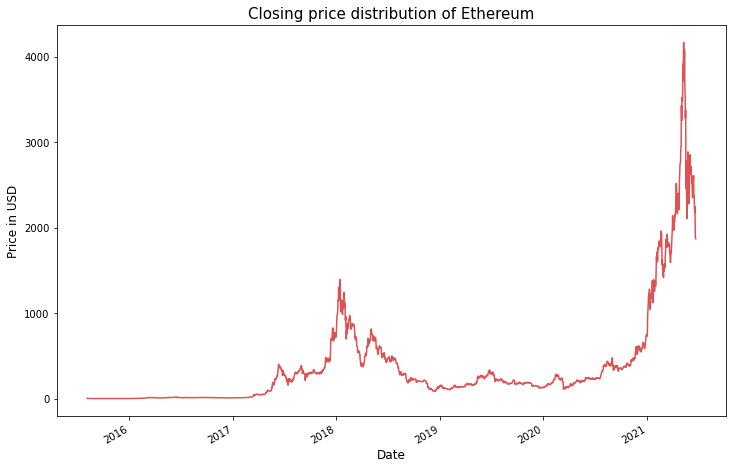

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Ethereum", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-06,3.536610,2.521120,2.831620,2.772120,1.643290e+05,2.772120
2015-08-07,2.798810,0.714725,2.793760,0.753325,6.741880e+05,0.753325
2015-08-08,0.879810,0.629191,0.706136,0.701897,5.321700e+05,0.701897
2015-08-09,0.729854,0.636546,0.713989,0.708448,4.052830e+05,0.708448
2015-08-10,1.131410,0.663235,0.708087,1.067860,1.463100e+06,1.067860
...,...,...,...,...,...,...
2021-06-17,2377.195068,2147.308350,2374.586914,2231.733154,2.275282e+10,2231.733154
2021-06-18,2278.415039,2168.885010,2235.159180,2178.499023,1.876585e+10,2178.499023
2021-06-19,2275.382812,2049.962646,2171.337891,2246.364502,2.253593e+10,2246.364502


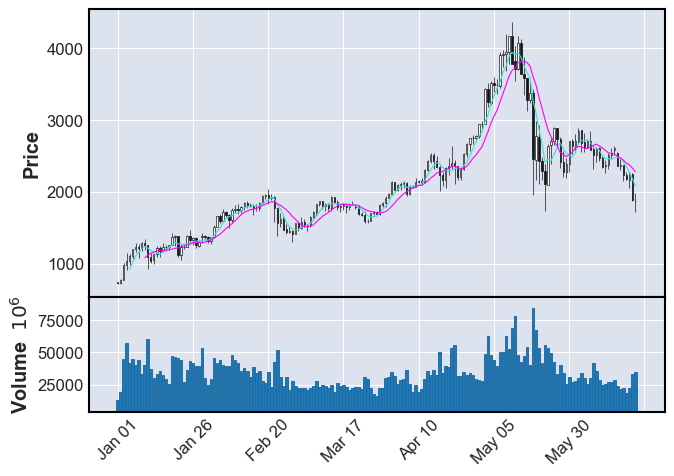

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
base_df

,High,Low,Open,Close,Volume,Adj Close,Spread
Date,,,,,,,
2015-08-06,3.536610,2.521120,2.831620,2.772120,1.643290e+05,2.772120,1.015490
2015-08-07,2.798810,0.714725,2.793760,0.753325,6.741880e+05,0.753325,2.084085
2015-08-08,0.879810,0.629191,0.706136,0.701897,5.321700e+05,0.701897,0.250619
2015-08-09,0.729854,0.636546,0.713989,0.708448,4.052830e+05,0.708448,0.093308
2015-08-10,1.131410,0.663235,0.708087,1.067860,1.463100e+06,1.067860,0.468175
...,...,...,...,...,...,...,...
2021-06-17,2377.195068,2147.308350,2374.586914,2231.733154,2.275282e+10,2231.733154,229.886719
2021-06-18,2278.415039,2168.885010,2235.159180,2178.499023,1.876585e+10,2178.499023,109.530029
2021-06-19,2275.382812,2049.962646,2171.337891,2246.364502,2.253593e+10,2246.364502,225.420166


In [13]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2015-08-06,2.772120
1,2015-08-07,0.753325
2,2015-08-08,0.701897
3,2015-08-09,0.708448
4,2015-08-10,1.067860
...,...,...
2138,2021-06-17,2231.733154
2139,2021-06-18,2178.499023
2140,2021-06-19,2246.364502
2141,2021-06-20,1888.447510


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2162,2021-07-18,2683.338870,2512.999585,2843.768600
2163,2021-07-19,2688.795110,2522.358280,2839.257901
2164,2021-07-20,2684.149175,2522.855349,2854.982175
2165,2021-07-21,2689.789763,2505.423308,2859.386297
2166,2021-07-22,2685.250077,2514.552860,2849.728388


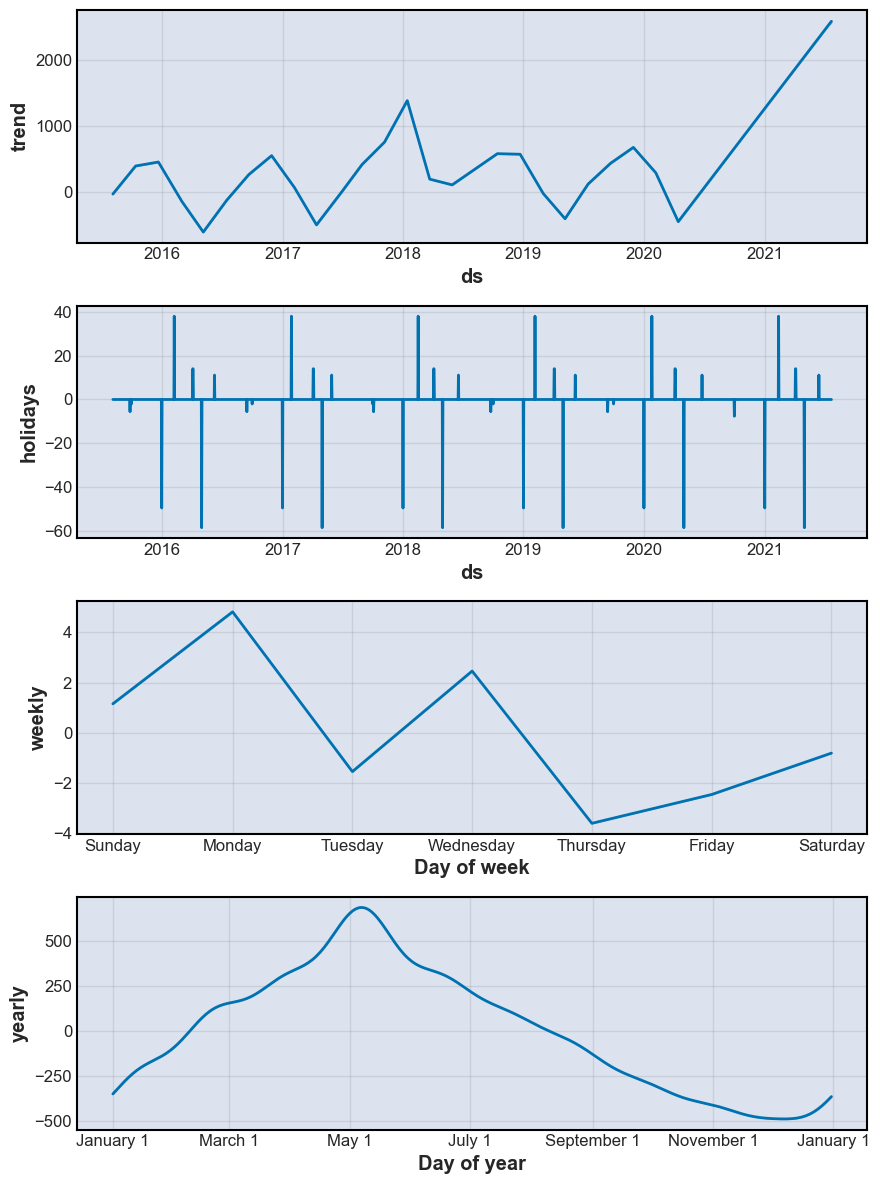

In [18]:
m = Prophet(changepoint_prior_scale=.7)
#m.add_country_holidays(country_name='US')
m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

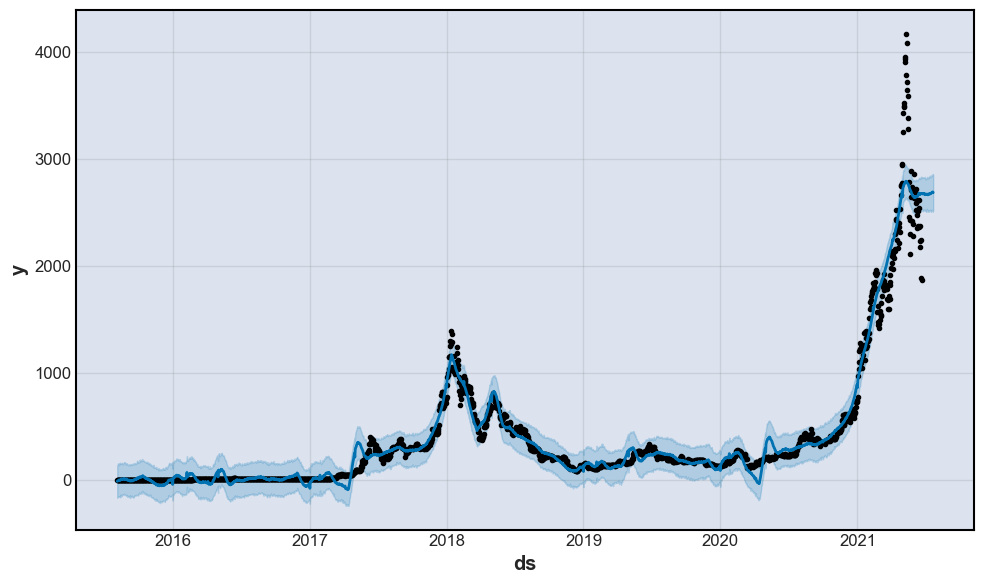

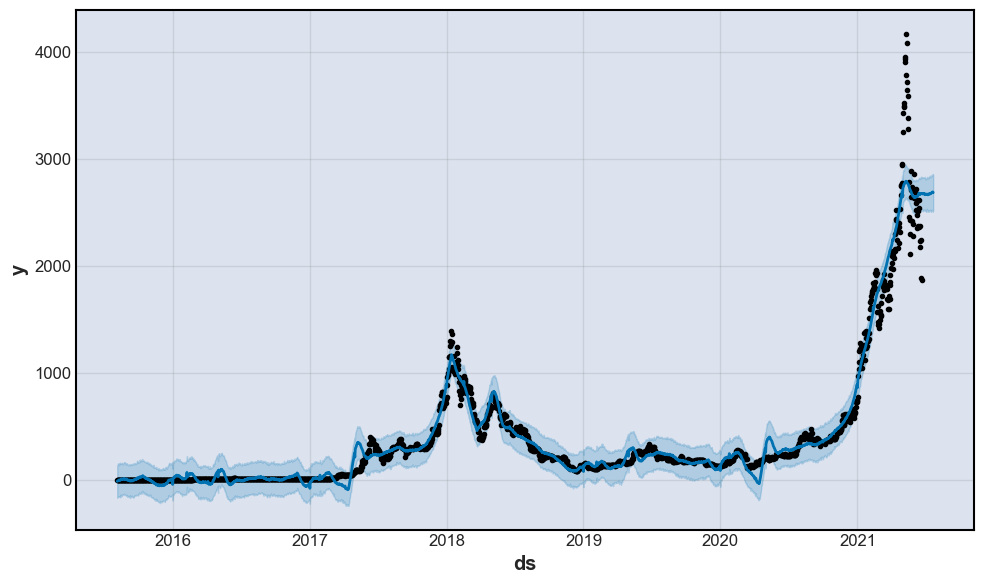

In [19]:
m.plot(forecast)